In [130]:
import sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [131]:
# Read data
data = pd.read_csv("./data/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [132]:
data.isnull().any()
data = data.fillna(method='ffill')

In [133]:
# Verbose
# interested_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']

# concise
interested_columns = data.columns[:-1]
label_column = data.columns[-1]; 
print(interested_columns, label_column)
X = data[interested_columns].values
y = data[label_column].values.reshape(-1,1)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object') quality


In [134]:
X.shape, y.shape

((1599, 11), (1599, 1))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279, 1), (320, 1))

In [137]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
y_pred = model.predict(X_test)

In [139]:
print(model.coef_)
print(model.intercept_)
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test, y_pred))


[[ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
  -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
  -2.54486051e-01  9.24040106e-01  2.67797417e-01]]
[34.99871063]
0.3844711978201237
0.3283887639580235


In [155]:
y_pred.shape, X_test[:, 0:3].shape

((320, 1), (320, 3))

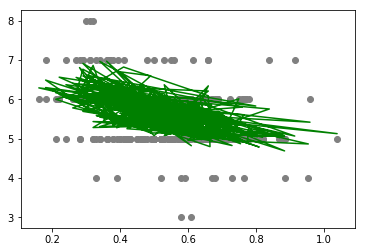

In [156]:
X_test = X_test[:,1].reshape(-1,1)
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred,color='green')
plt.show()